In [1]:
!pip install pandas

In [1]:
import pandas as pd
data = pd.read_csv("DACT Classfier Databse - Sheet1.csv")

In [2]:
data

,Question,Label
0,What does Creatives build an individual s inte...,Committee
1,What does Creatives use to create for Aaruush TV?,Committee
2,What sub domains does Creatives have?,Committee
3,What is the name of the committee that helps e...,Committee
4,What does Deco & Arts help?\r,Committee
...,...,...
125,What is X-Zone?,Domain
126,Which domain conducts brainstorming events?,Domain
127,Which domain conducts treasure hunts?,Domain
128,How do domains help in aaruush main days?,Domain


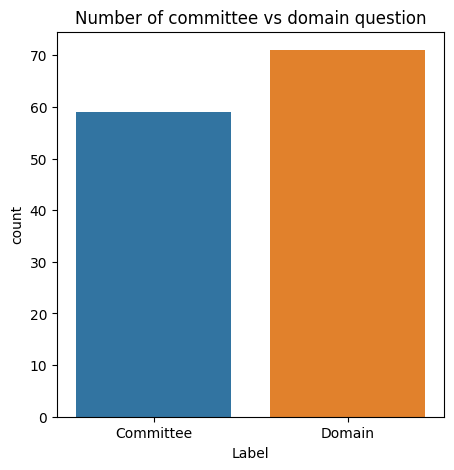

In [3]:
# !pip install matplotlib!
# !pip install seaborn
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
total = len(data)
plt.figure(figsize = (5, 5))
plt.title("Number of committee vs domain question")
ax = sns.countplot(x = 'Label', data = data)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

In [4]:
import string
# body_len
data['body_len'] = data.Question.apply(lambda x: len(x) - x.count(" "))
# punct%
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100 
data['punct%'] = data.Question.apply(lambda x: count_punct(x))

In [5]:
data

,Question,Label,body_len,punct%
0,What does Creatives build an individual s inte...,Committee,73,1.4
1,What does Creatives use to create for Aaruush TV?,Committee,41,2.4
2,What sub domains does Creatives have?,Committee,32,3.1
3,What is the name of the committee that helps e...,Committee,110,0.9
4,What does Deco & Arts help?\r,Committee,23,8.7
...,...,...,...,...
125,What is X-Zone?,Domain,13,15.4
126,Which domain conducts brainstorming events?,Domain,39,2.6
127,Which domain conducts treasure hunts?,Domain,33,3.0
128,How do domains help in aaruush main days?,Domain,34,2.9


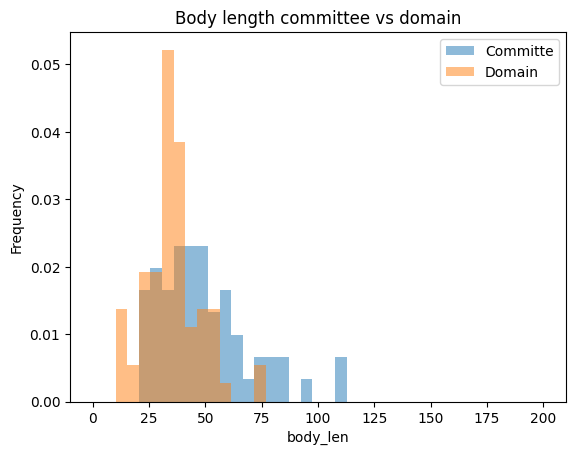

In [6]:
import numpy as np
bins = np.linspace(0, 200, 40)
data.loc[data.Label == 'Committee', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Committe')
data.loc[data.Label == 'Domain', 'body_len'].plot(kind = 'hist', bins = bins, alpha = 0.5, density = True, label = 'Domain')
plt.legend(loc = 'best')
plt.xlabel("body_len")
plt.title("Body length committee vs domain")
plt.show()

In [7]:
!pip install nltk
import nltk
# nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
# ps = nltk.PorterStemmer()
# wn = nltk.WordNetLemmatizer()
!pip install -U scikit-learn

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dvipa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dvipa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dvipa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
import nltk
from nltk.corpus import words
import re
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [9]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.findall('\S+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in words.words()]
    return text
# Apply function to body_text 
data['cleaned_text'] = data['Question'].apply(lambda x: clean_text(x))
data[['Question', 'cleaned_text']].head(10)
data

,Question,Label,body_len,punct%,cleaned_text
0,What does Creatives build an individual s inte...,Committee,73,1.4,"[creatives, skill]"
1,What does Creatives use to create for Aaruush TV?,Committee,41,2.4,"[creatives, aaruush, tv]"
2,What sub domains does Creatives have?,Committee,32,3.1,"[domain, creatives]"
3,What is the name of the committee that helps e...,Committee,110,0.9,"[help, line, organisation]"
4,What does Deco & Arts help?\r,Committee,23,8.7,"[deco, art]"
...,...,...,...,...,...
125,What is X-Zone?,Domain,13,15.4,[xzone]
126,Which domain conducts brainstorming events?,Domain,39,2.6,"[conduct, brainstorming, event]"
127,Which domain conducts treasure hunts?,Domain,33,3.0,"[conduct, hunt]"
128,How do domains help in aaruush main days?,Domain,34,2.9,"[domain, aaruush]"


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 

X_train, X_test, Y_train, Y_test = train_test_split(data[['Question', 'body_len', 'punct%']], data.Label, random_state = 42, test_size = 0.2)

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Question'])

tfidf_train = tfidf_vect.transform(X_train['Question'])
tfidf_test = tfidf_vect.transform(X_test['Question'])

X_train = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop = True), pd.DataFrame(tfidf_train.toarray())], axis = 1)
X_test = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop = True), pd.DataFrame(tfidf_test.toarray())], axis = 1)

In [11]:
X_train

,body_len,punct%,0,1,2,3,4,5,6,7,...,113,114,115,116,117,118,119,120,121,122
0,32,3.1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,56,3.6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,65,1.5,0.000000,0.0,0.0,0.0,0.0,0.571324,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535243,0.0
3,73,1.4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,26,3.8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,76,2.6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
100,34,2.9,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
101,29,3.4,0.379913,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
102,36,2.8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [12]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import precision_recall_fscore_support as score

In [13]:
def explore_rf_params(n_est, depth):
    rf = RFC(n_estimators = n_est, max_depth = depth, n_jobs = -1, random_state = 42)
    rf_model = rf.fit(X_train, Y_train)
    Y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(Y_test, Y_pred, pos_label = 'Committee', average = 'binary')
    print(f"Est: {n_est} / Depth: {depth} ---- Precision: {round(precision, 3)} / Recall: {round(recall, 3)} / Accuracy: {round((Y_pred==Y_test).sum() / len(Y_pred), 3)}")
    
for n_est in [50, 100, 150]: 
    for depth in [10, 20, 30, None]: 
        explore_rf_params(n_est, depth) 

C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 50 / Depth: 10 ---- Precision: 0.75 / Recall: 0.462 / Accuracy: 0.654
Est: 50 / Depth: 20 ---- Precision: 0.778 / Recall: 0.538 / Accuracy: 0.692


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got 

Est: 50 / Depth: 30 ---- Precision: 0.778 / Recall: 0.538 / Accuracy: 0.692
Est: 50 / Depth: None ---- Precision: 0.778 / Recall: 0.538 / Accuracy: 0.692


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got 

Est: 100 / Depth: 10 ---- Precision: 0.75 / Recall: 0.462 / Accuracy: 0.654


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 100 / Depth: 20 ---- Precision: 0.778 / Recall: 0.538 / Accuracy: 0.692


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 100 / Depth: 30 ---- Precision: 0.8 / Recall: 0.615 / Accuracy: 0.731


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 100 / Depth: None ---- Precision: 0.8 / Recall: 0.615 / Accuracy: 0.731


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 150 / Depth: 10 ---- Precision: 0.75 / Recall: 0.462 / Accuracy: 0.654


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 150 / Depth: 20 ---- Precision: 0.8 / Recall: 0.615 / Accuracy: 0.731


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 150 / Depth: 30 ---- Precision: 0.8 / Recall: 0.615 / Accuracy: 0.731
Est: 150 / Depth: None ---- Precision: 0.8 / Recall: 0.615 / Accuracy: 0.731


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [14]:
# Instantiate RandomForestClassifier with optimal set of hyperparameters 
import time
rf = RFC(n_estimators = 100, max_depth = None, random_state = 42, n_jobs = -1)
# Fit model
start = time.time()
rf_model = rf.fit(X_train, Y_train)
end = time.time()
fit_time = end - start
# Predict 
start = time.time()
Y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = end - start
# Time and prediction results
precision, recall, fscore, support = score(Y_test, Y_pred, pos_label = 'Committee', average = 'binary')
print(f"Fit time: {round(fit_time, 3)} / Predict time: {round(pred_time, 3)}")
print(f"Precision: {round(precision, 3)} / Recall: {round(recall, 3)} / Accuracy: {round((Y_pred==Y_test).sum() / len(Y_pred), 3)}")

C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fit time: 0.253 / Predict time: 0.036
Precision: 0.8 / Recall: 0.615 / Accuracy: 0.731


C:\Users\dvipa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot: >

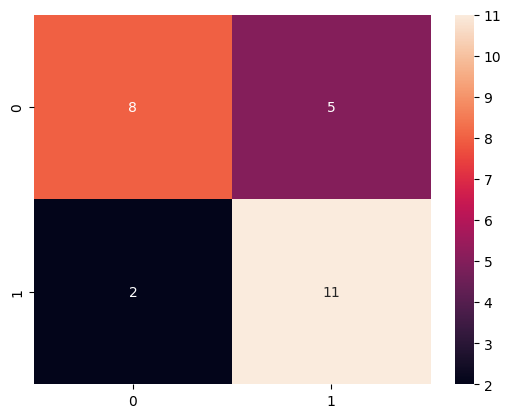

In [15]:
# Confusion matrix for RandomForestClassifier
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, annot = True, fmt = 'd')

In [16]:
!pip install pickle-mixin

In [24]:
import pickle
filename = 'DACT_Classfication.model'
pickle.dump(rf_model, open(filename, 'wb'))

In [26]:
X_test[0]

,body_len,punct%,0,1,2,3,4,5,6,7,...,113,114,115,116,117,118,119,120,121,122
0,79,1.3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,72,1.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,32,3.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,44,2.3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,26,3.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,62,1.6,0.495458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6,25,4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,38,2.6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,36,2.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,49,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [32]:
type(X_test[1])

pandas.core.series.Series

In [63]:
array = (X_test[0]).to_numpy()
k = 123 - len(array)
zero_array = np.zeros((k,))
# final_arr = np.concatenate(array, zero_array)
final_array = np.array((array.tolist())+(zero_array.tolist()))
# print(len(final_array))
fin_array = np.append(final_array,np.array([4., 7.]))
print((array))


[0.         0.         0.         0.         0.         0.49545814
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [60]:
res = rf_model.predict([fin_array])

In [61]:
res

array(['Committee'], dtype=object)

In [ ]:
def quest_vect(Question):
        